In [29]:
countries = ["korea-south", "united-states", "india", "nicaragua"]
baseURLa = "https://api.covid19api.com/total/country/"
baseURLb = "/status/confirmed?from=2020-01-01T00:00:00Z&to=2020-05-20T00:00:00Z"

In [30]:
import requests
import mysql.connector
connection = mysql.connector.connect(user='root', password='123456789', host='127.0.0.1', database="covid_data")
cursor = connection.cursor(buffered=True)

In [31]:
korea_request = requests.get(baseURLa + countries[0] + baseURLb)

korea_data = korea_request.json()

print(korea_data[0])

{'Country': 'Korea (South)', 'CountryCode': '', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '0', 'Lon': '0', 'Cases': 1, 'Status': 'confirmed', 'Date': '2020-01-22T00:00:00Z'}


In [32]:
#for day in korea_data:
#    query = ("INSERT INTO covid_data.new_table (country, cases, province, date) VALUES (%s, %s, %s, %s)")
    
#    #day = korea_data[0]
#    day["Date"] = day["Date"].split("T")[0]
    
#    cursor.execute(query, (day["Country"], day["Cases"], day["Province"], day["Date"]))
#    connection.commit()

In [35]:
us_request = requests.get(baseURLa + countries[1] + baseURLb)

us_data = us_request.json()

print(us_data[0])

{'Country': 'United States of America', 'CountryCode': '', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '0', 'Lon': '0', 'Cases': 1, 'Status': 'confirmed', 'Date': '2020-01-22T00:00:00Z'}


In [36]:
for day in us_data:
    query = ("INSERT INTO covid_data.new_table (country, cases, province, date) VALUES (%s, %s, %s, %s)")
    day["Date"] = day["Date"].split("T")[0]
    
    cursor.execute(query, (day["Country"], day["Cases"], day["Province"], day["Date"]))
    connection.commit()

In [41]:
india_request = requests.get(baseURLa + countries[2] + baseURLb)

india_data = india_request.json()

print(india_data[0])

{'Country': 'India', 'CountryCode': '', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '0', 'Lon': '0', 'Cases': 0, 'Status': 'confirmed', 'Date': '2020-01-22T00:00:00Z'}


In [45]:
#for day in india_data:
#    query = ("INSERT INTO covid_data.new_table (country, cases, province, date) VALUES (%s, %s, %s, %s)")
#    day["Date"] = day["Date"].split("T")[0]
#    
#    cursor.execute(query, (day["Country"], day["Cases"], day["Province"], day["Date"]))
#    connection.commit()

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [44]:
#get all cases from the database
US_query = ("SELECT * FROM new_table WHERE country='United States of America'")
cursor.execute(US_query)
US_results = cursor.fetchall()

SK_query = ("SELECT * FROM new_table WHERE country='Korea (South)'")
cursor.execute(SK_query)
SK_results = cursor.fetchall()

IN_query = ("SELECT * FROM new_table WHERE country='India'")
cursor.execute(IN_query)
IN_results = cursor.fetchall()

print(US_results[0])

#cursor.close();


(352, 'United States of America', '', 1, datetime.date(2020, 1, 22))


In [45]:
def getCasesFromData(dataset):
    dates = []
    for d in dataset:
        #print(d)
        dates.append(d[3])
        
    return dates
        

In [46]:
def getDatesFromData(dataset):
    dates = []
    for d in dataset:
        #print(d)
        dates.append(d[4])
        
    return dates

In [47]:
import datetime
from matplotlib.dates import drange

US_cases = getCasesFromData(US_results)
US_dates = getDatesFromData(US_results)

SK_cases = getCasesFromData(SK_results)
SK_dates = getDatesFromData(SK_results)

IN_cases = getCasesFromData(IN_results)
IN_dates = getDatesFromData(IN_results)

print(len(US_dates), len(SK_dates), len(IN_dates))
print(len(US_cases), len(SK_cases), len(IN_cases))

120 120 120
120 120 120


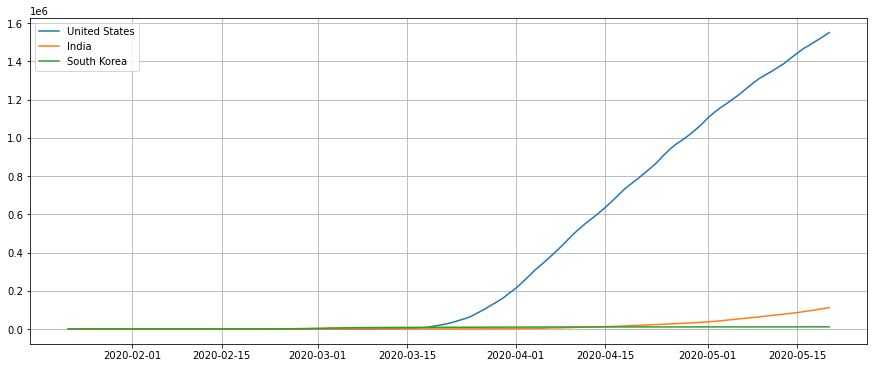

In [52]:
# Data for plotting

plt.subplots(figsize=(15,6))
plt.grid()
plt.plot(US_dates, US_cases, label="United States")
plt.plot(IN_dates, IN_cases, label="India")
plt.plot(US_dates, SK_cases, label="South Korea")

plt.legend()

plt.show()

In [37]:
#connection.close()